# Machine Learning Model

## Load the data

In [31]:
import pandas as pd

df = pd.read_excel("data/MSFT_Linkedin_Processed.xlsx", parse_dates=["Date"], index_col=0)
df


,Open,High,Low,Close,Volume,change_tomorrow,change_tomorrow_direction
Date,,,,,,,
2016-12-08,61.299999,61.580002,60.840000,61.009998,21220800,1.549141,UP
2016-12-09,61.180000,61.990002,61.130001,61.970001,27349400,0.321694,UP
2016-12-12,61.820000,62.299999,61.720001,62.169998,20198100,1.286125,UP
2016-12-13,62.500000,63.419998,62.240002,62.980000,35718900,-0.478620,DOWN
2016-12-14,63.000000,63.450001,62.529999,62.680000,30352700,-0.159793,DOWN
...,...,...,...,...,...,...,...
2023-10-09,324.750000,330.299988,323.179993,329.820007,19891200,-0.435456,DOWN
2023-10-10,330.959991,331.100006,327.670013,328.390015,20557100,1.212321,UP
2023-10-11,331.209991,332.820007,329.140015,332.420013,20063200,-0.380484,DOWN


### Seperate the data

In [32]:
target = df.change_tomorrow
explanatory = df[["Open", "High", "Low", "Close", "Volume"]]

### Compute the model

In [33]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
model_dt = DecisionTreeRegressor(max_depth=15)

In [35]:
model_dt.fit(X=explanatory, y=target)

DecisionTreeRegressor(max_depth=15)

### Visualize the model

[Text(0.9402954931972789, 0.96875, 'Volume <= 92951148.0\nsquared_error = 3.253\nsamples = 1723\nvalue = 0.082'),
 Text(0.902359693877551, 0.90625, 'Volume <= 91578148.0\nsquared_error = 3.135\nsamples = 1719\nvalue = 0.073'),
 Text(0.8969175170068027, 0.84375, 'Volume <= 87003952.0\nsquared_error = 2.961\nsamples = 1718\nvalue = 0.083'),
 Text(0.8264880952380952, 0.78125, 'Volume <= 78979100.0\nsquared_error = 2.931\nsamples = 1716\nvalue = 0.078'),
 Text(0.7019557823129252, 0.71875, 'Volume <= 78451200.0\nsquared_error = 2.912\nsamples = 1707\nvalue = 0.088'),
 Text(0.6965136054421769, 0.65625, 'Low <= 332.96\nsquared_error = 2.874\nsamples = 1706\nvalue = 0.083'),
 Text(0.5273809523809524, 0.59375, 'High <= 335.87\nsquared_error = 2.884\nsamples = 1658\nvalue = 0.106'),
 Text(0.4119047619047619, 0.53125, 'High <= 335.165\nsquared_error = 2.893\nsamples = 1637\nvalue = 0.094'),
 Text(0.2795918367346939, 0.46875, 'Volume <= 46663750.0\nsquared_error = 2.882\nsamples = 1630\nvalue = 0.

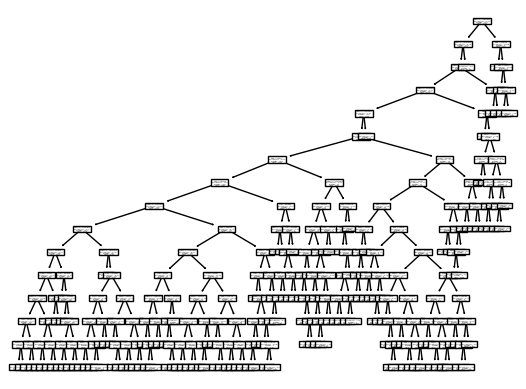

In [36]:
from sklearn.tree import plot_tree

plot_tree(decision_tree=model_dt, feature_names=model_dt.feature_names_in_)

### Calculate the predictions

In [37]:
y_pred = model_dt.predict(X=explanatory)

In [38]:
df_predictions = df[["change_tomorrow"]].copy()

df_predictions["prediction"] =y_pred
df_predictions

,change_tomorrow,prediction
Date,,
2016-12-08,1.549141,0.111448
2016-12-09,0.321694,0.271971
2016-12-12,1.286125,0.111448
2016-12-13,-0.478620,0.164264
2016-12-14,-0.159793,0.164264
...,...,...
2023-10-09,-0.435456,0.307557
2023-10-10,1.212321,0.307557
2023-10-11,-0.380484,0.307557


### Evaluate the model: compare predictions with the reality

In [40]:
model_dt.score(X=explanatory, y=target)

0.35938563266355095

### How to interpret the error

In [42]:
df_predictions = df[["change_tomorrow"]].copy()

df_predictions["prediction"] = y_pred
df_predictions

,change_tomorrow,prediction
Date,,
2016-12-08,1.549141,0.111448
2016-12-09,0.321694,0.271971
2016-12-12,1.286125,0.111448
2016-12-13,-0.478620,0.164264
2016-12-14,-0.159793,0.164264
...,...,...
2023-10-09,-0.435456,0.307557
2023-10-10,1.212321,0.307557
2023-10-11,-0.380484,0.307557


In [44]:
df_predictions["error"] = df_predictions.prediction - df_predictions.change_tomorrow

In [47]:
df_predictions.error.sum().round(2)

0.0

In [49]:
df_predictions["error2"] = df_predictions.error**2

In [51]:
sse = df_predictions.error2.sum()

In [53]:
mse = df_predictions.error2.mean()

In [54]:
import numpy as np

In [56]:
rmse = np.sqrt(mse)

<Axes: >

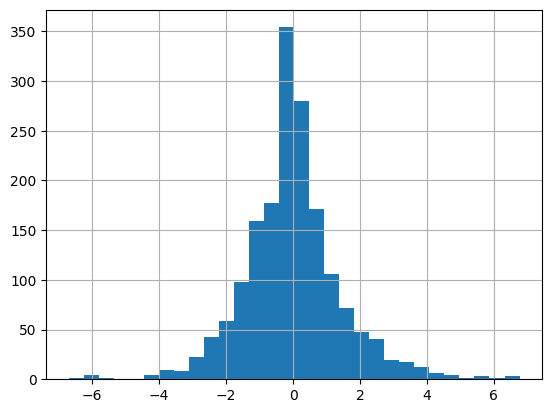

In [57]:
df_predictions.error.hist(bins=30)

In [58]:
rmse

1.4435513744163069